In [168]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras

In [169]:
np.random.seed(42)

In [170]:
import pandas as pd
dataset = pd.read_csv("./heart-disease/heart.csv")
dataset.shape

(303, 14)

In [171]:
X, y = dataset.iloc[:, :-1], dataset.loc[:, 'target']

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)


In [173]:
#y_train = np_utils.to_categorical(y_train, 2)
#y_test = np_utils.to_categorical(y_test, 2)

In [174]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [175]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [176]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
None


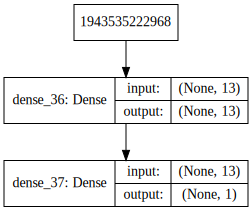

In [177]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [178]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor='loss')

In [179]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [180]:
%%time
model.fit(X_train_scaled, y_train, batch_size=200, epochs=100, validation_split=0.2, callbacks=[early_stopping, tensorboard], verbose=2);

Train on 193 samples, validate on 49 samples
Epoch 1/100
 - 0s - loss: 0.6951 - acc: 0.4249 - val_loss: 0.6981 - val_acc: 0.3878
Epoch 2/100
 - 0s - loss: 0.6946 - acc: 0.4508 - val_loss: 0.6973 - val_acc: 0.4286
Epoch 3/100
 - 0s - loss: 0.6939 - acc: 0.4870 - val_loss: 0.6965 - val_acc: 0.4490
Epoch 4/100
 - 0s - loss: 0.6933 - acc: 0.5026 - val_loss: 0.6957 - val_acc: 0.4898
Epoch 5/100
 - 0s - loss: 0.6926 - acc: 0.5078 - val_loss: 0.6949 - val_acc: 0.5102
Epoch 6/100
 - 0s - loss: 0.6919 - acc: 0.5389 - val_loss: 0.6942 - val_acc: 0.5102
Epoch 7/100
 - 0s - loss: 0.6913 - acc: 0.5648 - val_loss: 0.6934 - val_acc: 0.5102
Epoch 8/100
 - 0s - loss: 0.6906 - acc: 0.5803 - val_loss: 0.6925 - val_acc: 0.5714
Epoch 9/100
 - 0s - loss: 0.6900 - acc: 0.6218 - val_loss: 0.6916 - val_acc: 0.5714
Epoch 10/100
 - 0s - loss: 0.6893 - acc: 0.6321 - val_loss: 0.6908 - val_acc: 0.5714
Epoch 11/100
 - 0s - loss: 0.6886 - acc: 0.6684 - val_loss: 0.6898 - val_acc: 0.5918
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.5282 - acc: 0.8238 - val_loss: 0.4911 - val_acc: 0.8776
Epoch 98/100
 - 0s - loss: 0.5257 - acc: 0.8238 - val_loss: 0.4884 - val_acc: 0.8776
Epoch 99/100
 - 0s - loss: 0.5231 - acc: 0.8238 - val_loss: 0.4857 - val_acc: 0.8776
Epoch 100/100
 - 0s - loss: 0.5206 - acc: 0.8238 - val_loss: 0.4830 - val_acc: 0.8776
Wall time: 2.36 s


In [181]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 86.89%
